<a href="https://colab.research.google.com/github/Nastiiasaenko/Final-Project---Explainable-AI-/blob/main/notebooks/Training_on_data_to_capture_different_aspects_and_get_baseline_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your desired folder in Drive
drive_folder = '/content/drive/MyDrive/MIDS/XAI/XAI_Final_project'

# Ensure the folder exists
os.makedirs(drive_folder, exist_ok=True)

# Change the current working directory to the specified folder
os.chdir(drive_folder)

# Confirm the working directory
print("Current working directory:", os.getcwd())



Mounted at /content/drive
Current working directory: /content/drive/MyDrive/MIDS/XAI/XAI_Final_project


In [42]:
global_df = pd.read_csv('global_dataset_enriched.csv')

<ipython-input-42-35ce33a8a7d4>:1: DtypeWarning: Columns (5,6,8,10,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  global_df = pd.read_csv('global_dataset_enriched.csv')


In [5]:
global_df.head()

,title,body,source,timestamp,Misinfo_flag,type_of_misinfo,type_reddit,topic,subtopic,entities,...,\tMisinfo_flag,type_of_content,potential_prompt0,hashtags,gender,sentiment_category,Publisher,subtitle,prochoice_prolife,sentiment_generated
0,Health Canada approves AstraZeneca COVID-19 va...,NaN,Reddit,2021-02-27 06:33:45,1.0,myth,post_title,COVID,Vaccines,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
1,COVID-19 in Canada: 'Vaccination passports' a ...,NaN,Reddit,2021-02-26 07:11:07,1.0,myth,post_title,COVID,Vaccines,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
2,Coronavirus variants could fuel Canada's third...,NaN,Reddit,2021-02-21 07:50:08,1.0,myth,post_title,COVID,Vaccines,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
3,Canadian government to extend COVID-19 emergen...,NaN,Reddit,2021-02-20 06:35:13,1.0,myth,post_title,COVID,Vaccines,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
4,Canada: Pfizer is 'extremely committed' to mee...,NaN,Reddit,2021-02-16 11:36:28,1.0,myth,post_title,COVID,Vaccines,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE


In [6]:
global_df.shape

(240156, 21)

In [7]:
global_sample = global_df.sample(50000)

<ipython-input-8-fd12853ac3b0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=x_col, x=y_col, data=data, orient='h', palette='viridis')


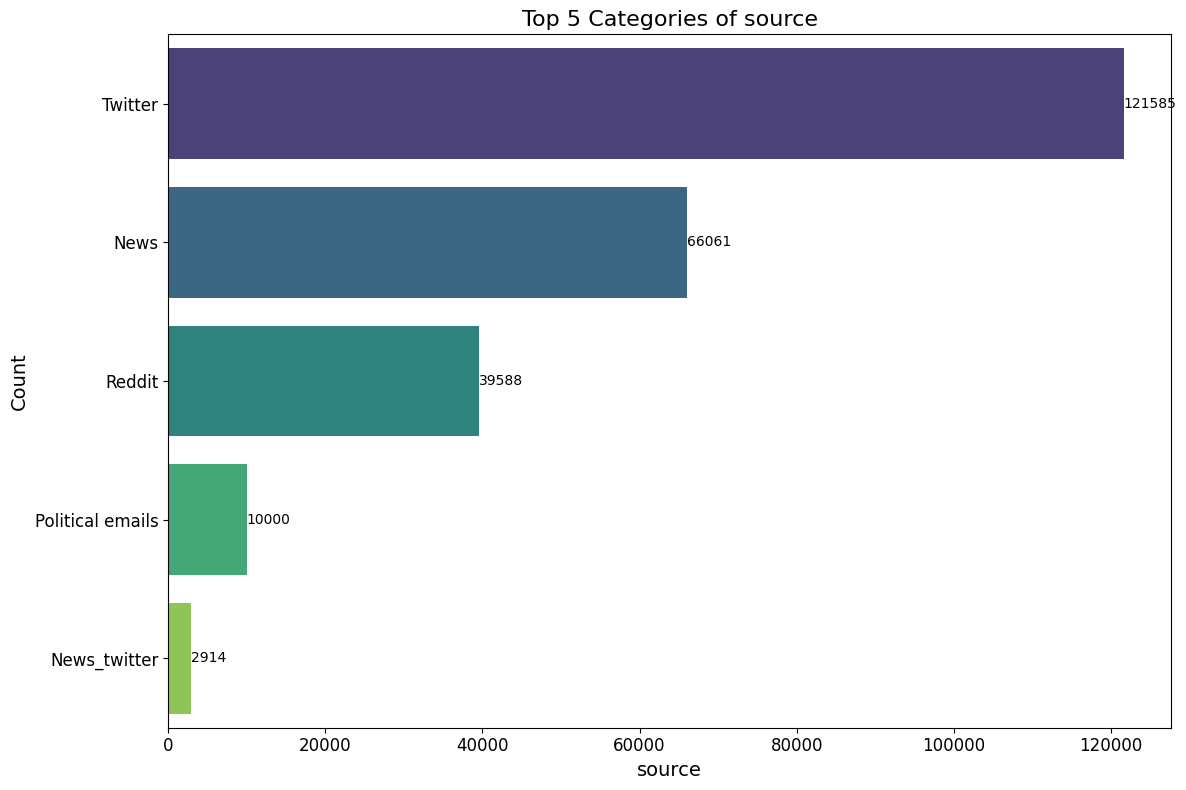

<ipython-input-8-fd12853ac3b0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=x_col, x=y_col, data=data, orient='h', palette='viridis')


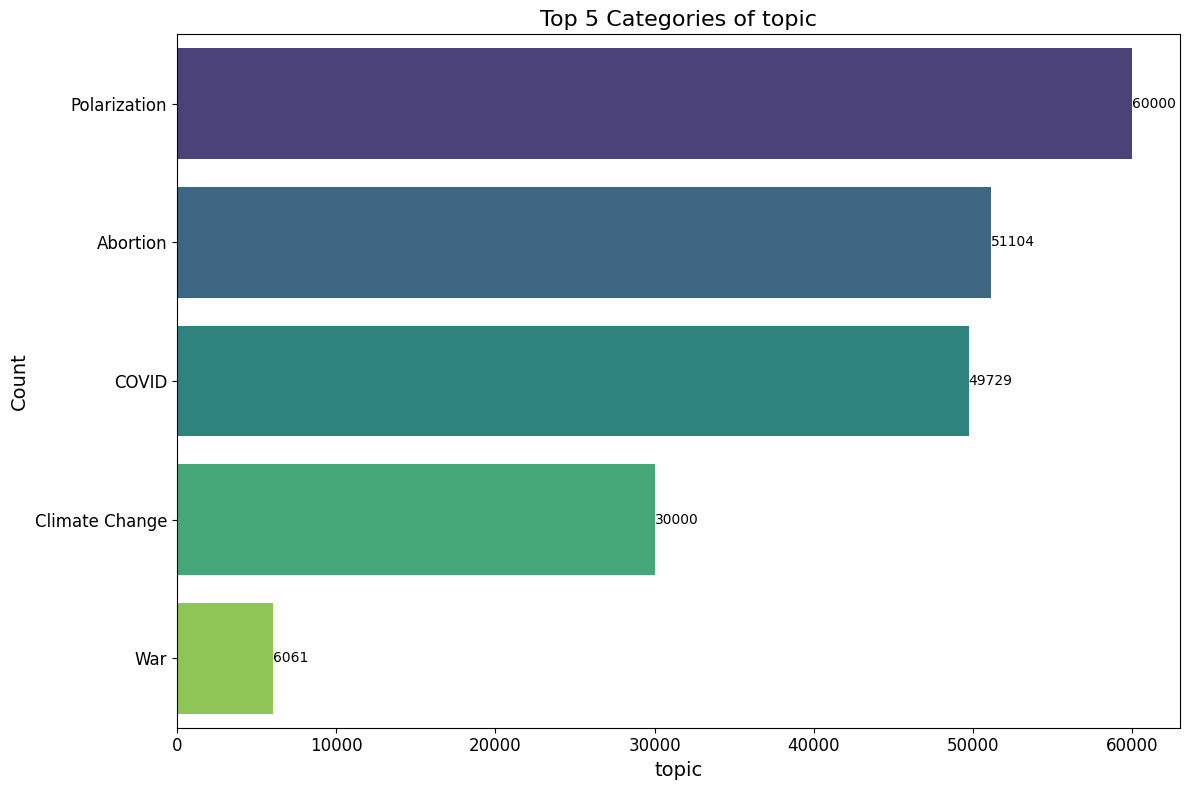

<ipython-input-8-fd12853ac3b0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=x_col, x=y_col, data=data, orient='h', palette='viridis')


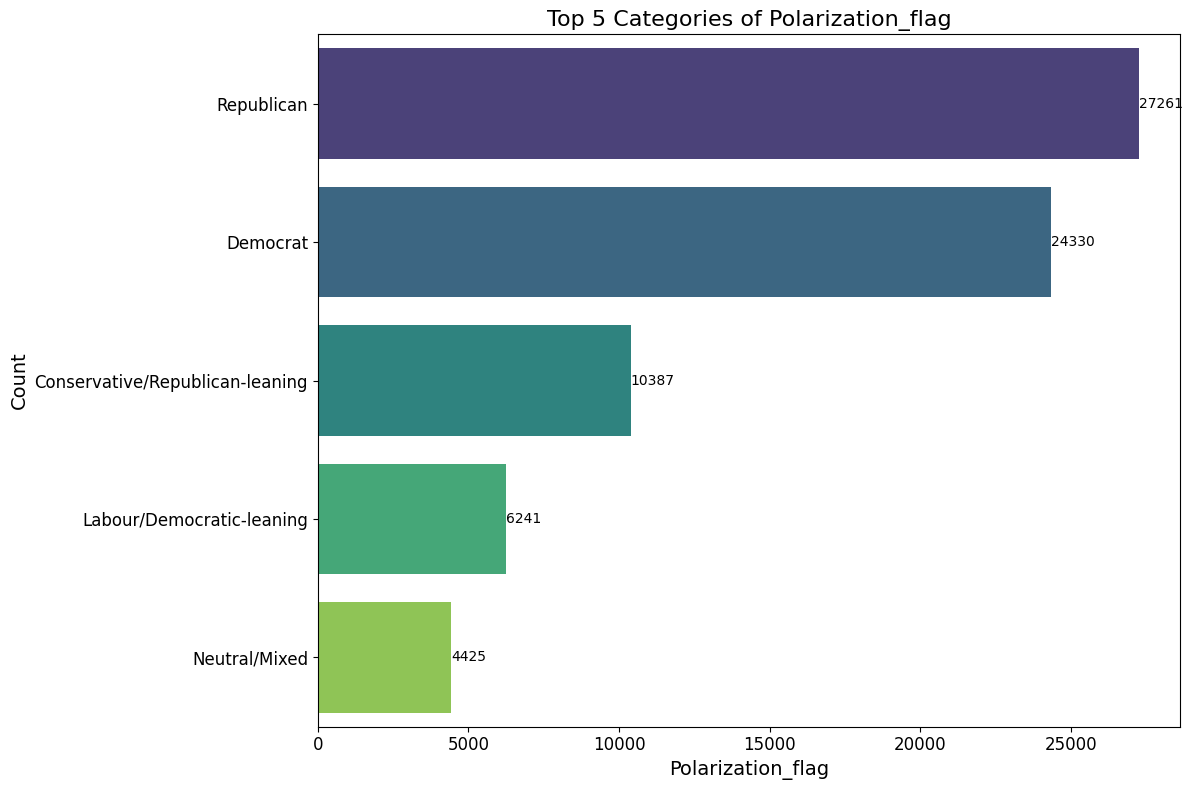

<ipython-input-8-fd12853ac3b0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')


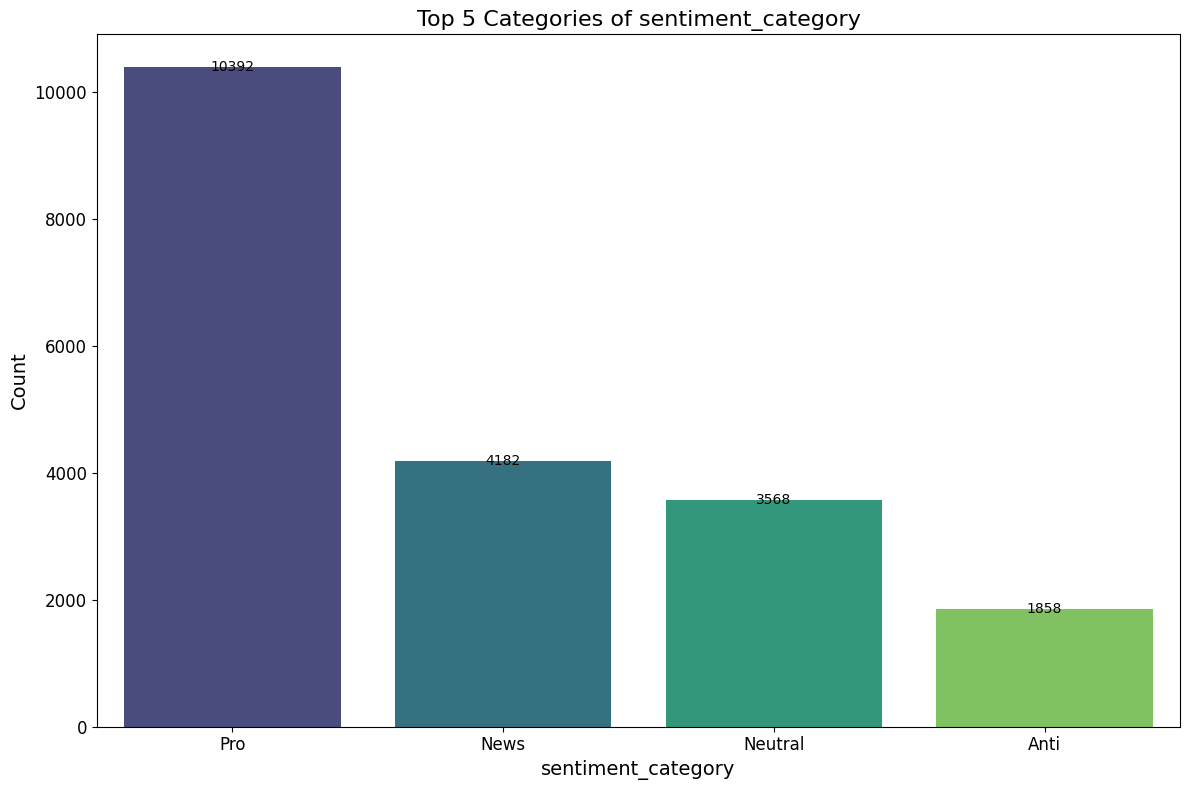

<ipython-input-8-fd12853ac3b0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')


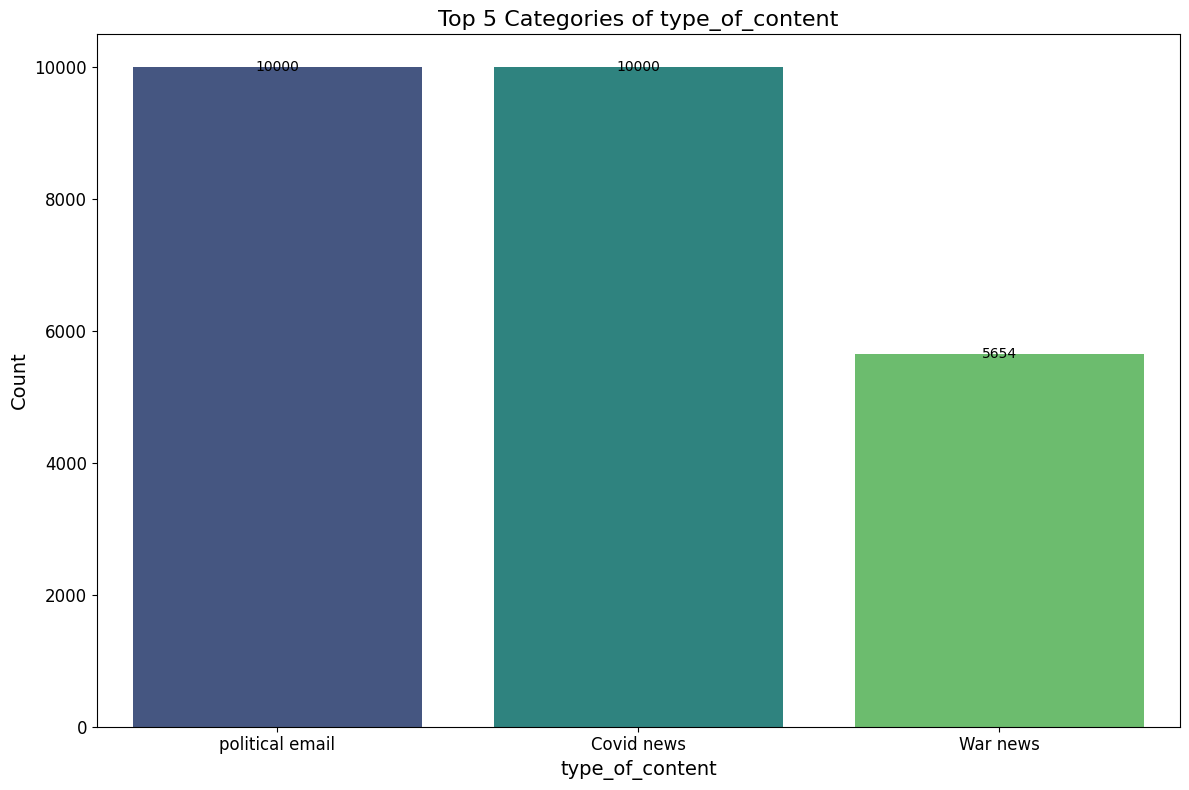

<ipython-input-8-fd12853ac3b0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')


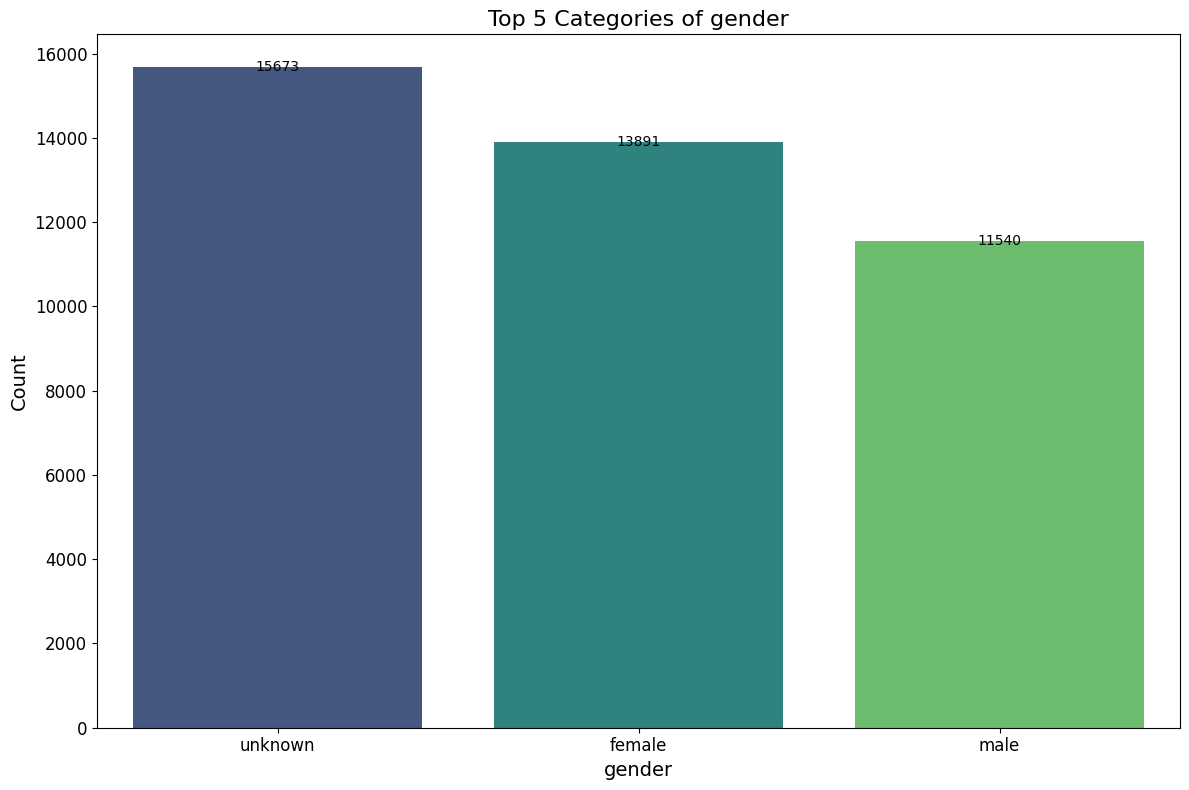

<ipython-input-8-fd12853ac3b0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=x_col, x=y_col, data=data, orient='h', palette='viridis')


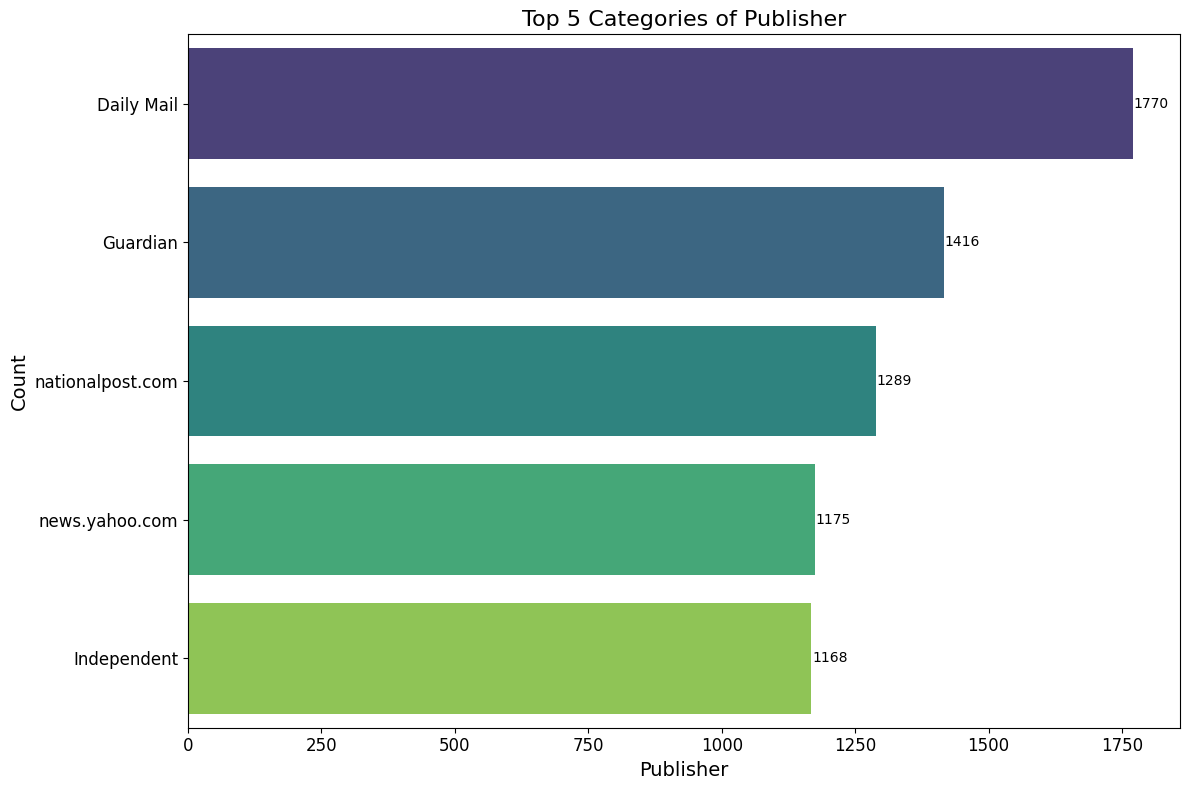

<ipython-input-8-fd12853ac3b0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=x_col, x=y_col, data=data, orient='h', palette='viridis')


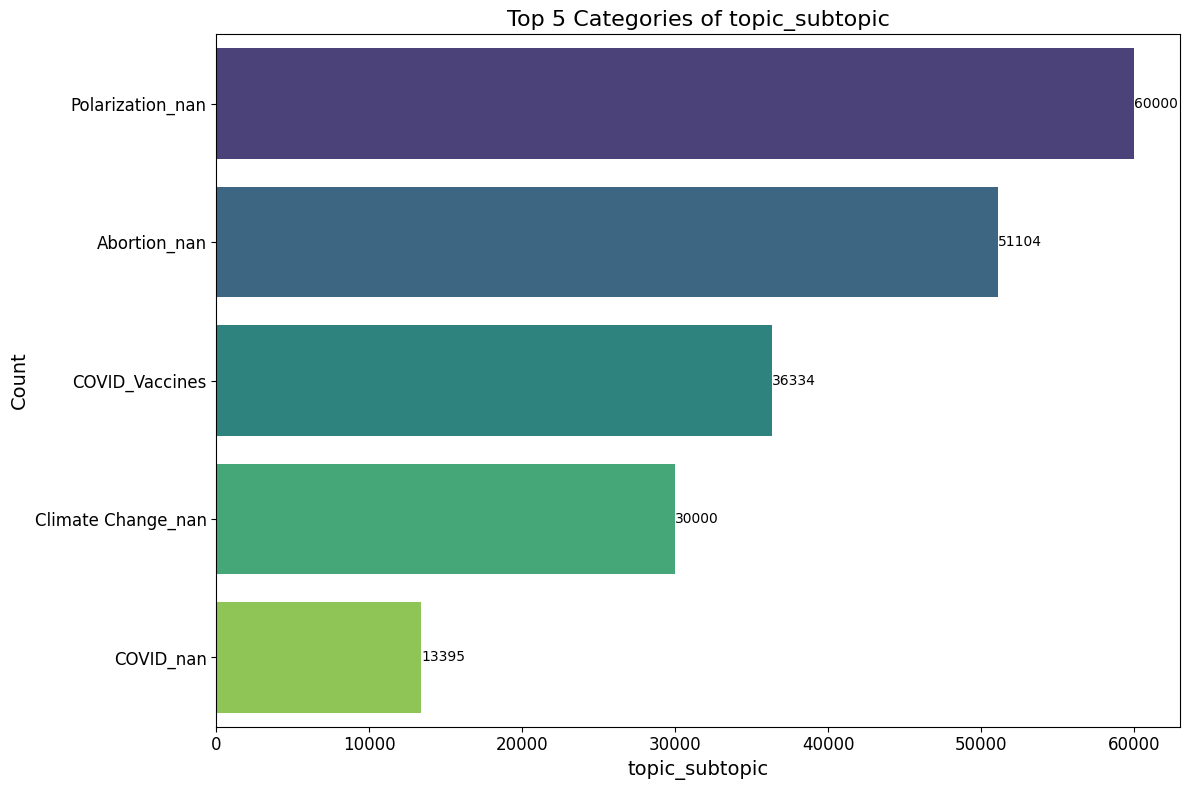

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning: Combine 'Reddit' and 'reddit' into a single category
global_df['source'] = global_df['source'].str.capitalize()  # Standardize capitalization (e.g., Reddit)

# Function to create labeled bar plots
def labeled_barplot(data, x_col, y_col, title, xlabel, ylabel, horizontal=False):
    plt.figure(figsize=(12, 8))
    if horizontal:
        ax = sns.barplot(y=x_col, x=y_col, data=data, orient='h', palette='viridis')
    else:
        ax = sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')

    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)

    # Add value labels
    for p in ax.patches:
        if horizontal:
            ax.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2.),
                        ha='left', va='center', fontsize=10, color='black')
        else:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 1),
                        ha='center', va='center', fontsize=10, color='black')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# --- Plotting Functionality ---
def plot_distribution(column, global_df):
    # Calculate value counts
    value_counts = global_df[column].value_counts().reset_index()
    value_counts.columns = [column, 'count']

    # Filter top 5 categories
    top_5 = value_counts.head(5)

    # Determine orientation
    if len(value_counts) > 5:
        labeled_barplot(top_5, column, 'count', f'Top 5 Categories of {column}', column, 'Count', horizontal=True)
    else:
        labeled_barplot(top_5, column, 'count', f'Top 5 Categories of {column}', column, 'Count')

# Apply to the selected columns
columns_to_plot = ['source', 'topic', 'Polarization_flag', 'sentiment_category', 'type_of_content', 'gender', 'Publisher']
for col in columns_to_plot:
    if col in global_df.columns:  # Ensure the column exists
        plot_distribution(col, global_df)

# Topic-Subtopic combinations (if 'subtopic' exists in dataframe)
if 'subtopic' in global_df.columns and 'topic' in global_df.columns:
    global_df['topic_subtopic'] = global_df['topic'] + "_" + global_df['subtopic'].astype(str)
    topic_subtopic_counts = global_df['topic_subtopic'].value_counts().reset_index()
    topic_subtopic_counts.columns = ['topic_subtopic', 'count']

    # Display top 5 combinations
    plot_distribution('topic_subtopic', global_df)


In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

# Step 1: Create an images folder locally and in the GitHub repository
images_folder = "images"
if not os.path.exists(images_folder):
    os.makedirs(images_folder)

# Step 2: Function to create labeled bar plots and save them
def labeled_barplot(data, x_col, y_col, title, xlabel, ylabel, file_name, horizontal=False):
    plt.figure(figsize=(12, 8))
    if horizontal:
        ax = sns.barplot(y=x_col, x=y_col, data=data, orient='h', palette='viridis')
    else:
        ax = sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')

    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)

    # Add value labels
    for p in ax.patches:
        if horizontal:
            ax.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2.),
                        ha='left', va='center', fontsize=10, color='black')
        else:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 1),
                        ha='center', va='center', fontsize=10, color='black')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    # Save the plot as an image in the images folder
    plot_path = os.path.join(images_folder, file_name)
    plt.savefig(plot_path)
    plt.close()

# Step 3: Plotting functionality
def plot_distribution(column, global_df):
    # Calculate value counts
    value_counts = global_df[column].value_counts().reset_index()
    value_counts.columns = [column, 'count']

    # Filter top 5 categories
    top_5 = value_counts.head(5)

    # Determine orientation
    file_name = f"{column}_distribution.png"
    if len(value_counts) > 5:
        labeled_barplot(top_5, column, 'count', f'Top 5 Categories of {column}', column, 'Count', file_name, horizontal=True)
    else:
        labeled_barplot(top_5, column, 'count', f'Top 5 Categories of {column}', column, 'Count', file_name)

# Apply to the selected columns
columns_to_plot = ['source', 'topic', 'Polarization_flag', 'sentiment_category', 'type_of_content', 'gender', 'Publisher']
for col in columns_to_plot:
    if col in global_df.columns:  # Ensure the column exists
        plot_distribution(col, global_df)

# Topic-Subtopic combinations (if 'subtopic' exists in dataframe)
if 'subtopic' in global_df.columns and 'topic' in global_df.columns:
    global_df['topic_subtopic'] = global_df['topic'] + "_" + global_df['subtopic'].astype(str)
    plot_distribution('topic_subtopic', global_df)

# Step 4: Push images folder to GitHub
def push_to_github(folder_name, commit_message="Add images from data analysis"):
    # Add folder to GitHub
    try:
        subprocess.run(["git", "add", folder_name], check=True)
        subprocess.run(["git", "commit", "-m", commit_message], check=True)
        subprocess.run(["git", "push"], check=True)
        print(f"Successfully pushed {folder_name} to GitHub.")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred while pushing {folder_name} to GitHub: {e}")

# Push the images folder to your GitHub repository
push_to_github(images_folder, commit_message="Add visualizations from global_df analysis")


<ipython-input-9-95c4488eed82>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=x_col, x=y_col, data=data, orient='h', palette='viridis')
<ipython-input-9-95c4488eed82>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=x_col, x=y_col, data=data, orient='h', palette='viridis')
<ipython-input-9-95c4488eed82>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=x_col, x=y_col, data=data, orient='h', palette='viridis')
<ipython-input-9-95c4488eed82>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

Error occurred while pushing images to GitHub: Command '['git', 'commit', '-m', 'Add visualizations from global_df analysis']' returned non-zero exit status 128.


In [10]:
global_sample[global_sample['Misinfo_flag'].notna()]

,title,body,source,timestamp,Misinfo_flag,type_of_misinfo,type_reddit,topic,subtopic,entities,...,\tMisinfo_flag,type_of_content,potential_prompt0,hashtags,gender,sentiment_category,Publisher,subtitle,prochoice_prolife,sentiment_generated
192443,"""The people have spoken,"" says Zimbabwe's new ...",HARARE (Reuters) - Zimbabwe s new leader Emmer...,news,NaN,0.0,NaN,NaN,NaN,NaN,"{'people': ['Emmerson Mnangagwa', 'Robert Muga...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
194547,ADMIRAL “ACE” LYONS: “Why would an American Pr...,THIS MAN IS A GREAT PATRIOT! Retired General ...,news,NaN,1.0,NaN,NaN,NaN,NaN,"{'people': [], 'organizations': ['Ace Lyons']...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
191475,Chicago Cubs go 24 hours without winning a Wor...,Thursday 3 November 2016 Chicago Cubs go 24 ho...,news,NaN,1.0,NaN,NaN,NaN,NaN,"{'people': ['Chris Bryant', 'Thomas Ricketts',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
190397,Confirmed: FBI Raids Home of Former Trump Mana...,21st Century Wire says It s been confirmed tha...,news,NaN,1.0,NaN,NaN,NaN,NaN,"{'people': ['Paul Manafort', 'Robert Mueller',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
191881,French Foreign Minister: Assad’s Denials of Ch...,(AFP) — Syrian President Bashar ’s comment...,news,NaN,0.0,NaN,NaN,NaN,NaN,"{'people': ['Bashar ’s', 'Assad', 'Assad', 'A...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196920,WATCH: Trump Surrogate Tries To Defend Trump ...,It s a trap! That s the messaging that the T...,news,NaN,1.0,NaN,NaN,NaN,NaN,"{'people': ['Scottie Nell Hughes', 'Khizr Khan...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
39447,A 2015 research article about a lab-made coron...,NaN,news_twitter,NaN,1.0,NaN,NaN,COVID,NaN,"{'people': [], 'organizations': [], 'locations...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
67278,Comment,NaN,reddit,2022-12-17 04:25:29,1.0,Onion,NaN,All_news,NaN,"{'people': [], 'organizations': [], 'locations...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE
1434,Comment,Haha yeah you tell him. We only trust a truste...,Reddit,2019-05-25 07:21:28,1.0,myth,comment_body,COVID,Vaccines,"{'people': ['marijuana'], 'organizations': ['F...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE


In [11]:
global_sample.sample(1)

,title,body,source,timestamp,Misinfo_flag,type_of_misinfo,type_reddit,topic,subtopic,entities,...,\tMisinfo_flag,type_of_content,potential_prompt0,hashtags,gender,sentiment_category,Publisher,subtitle,prochoice_prolife,sentiment_generated
208645,"Soccer-Brazil suspends national competitions, ...",NaN,news,2020-03-15 20:17:58,NaN,NaN,NaN,COVID,NaN,"{'people': [], 'organizations': [], 'locations...",...,NaN,Covid news,"Soccer-Brazil suspends national competitions, ...",NaN,NaN,NaN,nationalpost.com,NaN,NaN,NEGATIVE


In [12]:
### Training on data

In [13]:
global_df.loc[240151,'entities']

"{'people': ['Volodymyr Zelensky', 'Liza', 'Denys Shmyhal', 'Samantha Power', 'Chasiv Yar'], 'organizations': ['the U.S. Agency for International Development', 'Defense Ministry', 'the Ukrainian Armed Forces'], 'locations': ['Russia', 'Ukraine', 'Vinnytsia', 'Russia', 'Ukraine', 'Vinnytsia', 'Mykolaiv', 'Russia', 'Vinnytsia']}"

## Training benchmark bias models

In [43]:
training_columns = ['title','body','source','timestamp','Misinfo_flag',
                    'type_of_misinfo',
                    'type_reddit',
                    'topic',
                    'subtopic',
                    'entities',
                    'Polarization_flag',
                    'type_of_content',
                    'hashtags',
                    'gender',
                    'sentiment_category',
                    'Publisher',
                    'subtitle',
                    'prochoice_prolife',
                    'sentiment_generated']
training_global = global_df[training_columns].copy() # Use .copy() to avoid SettingWithCopyWarning


In [44]:
training_global['Polarization_flag'].value_counts()

,count
Polarization_flag,
Republican,27261
Democrat,24330
Conservative/Republican-leaning,10387
Labour/Democratic-leaning,6241
Neutral/Mixed,4425
Democratic,2210
Neutral/Mixed (slightly Conservative),236


In [45]:
# prompt: unite categories of the polarization_flag
# Polarization_flag
# Republican	27261
# Democrat	24330
# Conservative/Republican-leaning	10387
# Labour/Democratic-leaning	6241
# Neutral/Mixed	4425
# Democratic	2210
# Neutral/Mixed (slightly Conservative)	236

# Define a mapping for uniting categories
polarization_mapping = {
    'Republican': 'Republican',
    'Democrat': 'Democrat',
    'Conservative/Republican-leaning': 'Republican',
    'Labour/Democratic-leaning': 'Democrat',
    'Neutral/Mixed': 'Neutral',
    'Democratic': 'Democrat',
    'Neutral/Mixed (slightly Conservative)': 'Neutral'
}

# Apply the mapping to the 'Polarization_flag' column
training_global['Polarization_flag'] = training_global['Polarization_flag'].replace(polarization_mapping)

# Verify the changes
training_global['Polarization_flag'].value_counts()

,count
Polarization_flag,
Republican,37648
Democrat,32781
Neutral,4661


## Polarization model

In [46]:
polarization_df = training_global[training_global['Polarization_flag'].notna()]
polarization_df = polarization_df[polarization_df['Polarization_flag'] != 'Neutral']

In [47]:
polarization_df.shape

(70429, 19)

In [48]:
### Polarization simple model

from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

import pandas as pd
import torch

# Load tokenizer and model
model_name = "vinai/bertweet-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)



emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
def preprocess_data(df):
    # Replace NaN with an empty string
    df['title'] = df['title'].fillna("")
    df['content'] = df['body'].fillna("")
    # Combine title and content
    df['text'] = df['title'] + ":  " + df['content']

    return df[['text', 'Polarization_flag']]

polarization_df = preprocess_data(polarization_df)


In [51]:
# Encode labels
label_mapping = {"Democrat": 0, "Republican": 1}
polarization_df['label'] = polarization_df['Polarization_flag'].map(label_mapping)


# Ensure the labels are integers
assert polarization_df['label'].dtype == 'int64'


In [52]:
polarization_df

,text,Polarization_flag,label
39729,: Congressman Leonard Lance (NJ-07) put pen t...,Republican,1
39730,: RT @HispanicCaucus: Trump's anti-immigrant ...,Democrat,0
39731,: Medicare is the largest buyer of Rx drugs i...,Democrat,0
39732,: When a veteran tells me they’re finding rel...,Democrat,0
39733,: I'm hosting another College Prep Workshop o...,Democrat,0
...,...,...,...
240151,"In a Flash of Fire and Shrapnel, a Smiling 4-Y...",Democrat,0
240152,Energy Was the Only Bright Spot in the Stock M...,Democrat,0
240153,The many parties involved complicate war crime...,Democrat,0
240154,An American’s Murky Path From Russian Propagan...,Democrat,0


In [56]:
from sklearn.model_selection import train_test_split

# Split the full dataset into train and temporary validation+test sets
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    polarization_df['text'], polarization_df['label'], test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42)



In [58]:
def tokenize_function(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=128)

train_encodings = tokenize_function(list(train_texts))
val_encodings = tokenize_function(list(val_texts))
test_encodings = tokenize_function(list(test_texts))


In [59]:
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, list(train_labels))
val_dataset = NewsDataset(val_encodings, list(val_labels))
test_dataset = NewsDataset(test_encodings, list(test_labels))


In [57]:
print(test_labels[:10])  # Check the first 10 elements


63043     0
79232     1
59063     0
81177     0
225559    1
45220     0
40671     1
222045    0
76703     1
55093     0
Name: label, dtype: int64


In [60]:
train_dataset

In [61]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=10,
    load_best_model_at_end=True,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [62]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)


<ipython-input-62-62670ca281bb>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [63]:
trainer.train()


Epoch,Training Loss,Validation Loss
1,0.432100,0.405787
2,0.325400,0.375788
3,0.236000,0.448164


TrainOutput(global_step=10566, training_loss=0.36117155524155825, metrics={'train_runtime': 1038.9388, 'train_samples_per_second': 162.694, 'train_steps_per_second': 10.17, 'total_flos': 1.111834964411136e+16, 'train_loss': 0.36117155524155825, 'epoch': 3.0})

In [64]:
# Define the directory where you want to save the model
model_dir = "./news_classifier_model"

# Save the trained model
model.save_pretrained(model_dir)

# Save the tokenizer
tokenizer.save_pretrained(model_dir)


('./news_classifier_model/tokenizer_config.json',
 './news_classifier_model/special_tokens_map.json',
 './news_classifier_model/vocab.txt',
 './news_classifier_model/bpe.codes',
 './news_classifier_model/added_tokens.json')

In [66]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the saved model and tokenizer
model_dir = "./news_classifier_model"
model = AutoModelForSequenceClassification.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

# Predict using the loaded model
def predict_label(text, model, tokenizer):
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**tokens)
    prediction = torch.argmax(outputs.logits, dim=1)
    return "Democratic" if prediction == 0 else "Republican"

sample_text = "The government promotes communism."
print(predict_label(sample_text, model, tokenizer))


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Republican


In [67]:
sample_text = "The government promotes christianity."
print(predict_label(sample_text, model, tokenizer))

Republican


In [68]:
trainer.evaluate()


{'eval_loss': 0.3757881820201874,
 'eval_runtime': 12.9954,
 'eval_samples_per_second': 541.962,
 'eval_steps_per_second': 33.935,
 'epoch': 3.0}

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
import numpy as np

# Get predictions
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)  # Predicted classes
true_labels = np.array(test_labels)  # True labels from test dataset


In [70]:
# Generate a classification report
report = classification_report(true_labels, predictions, target_names=["Democrat", "Republican"])
print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

    Democrat       0.83      0.80      0.81      3315
  Republican       0.83      0.86      0.84      3728

    accuracy                           0.83      7043
   macro avg       0.83      0.83      0.83      7043
weighted avg       0.83      0.83      0.83      7043



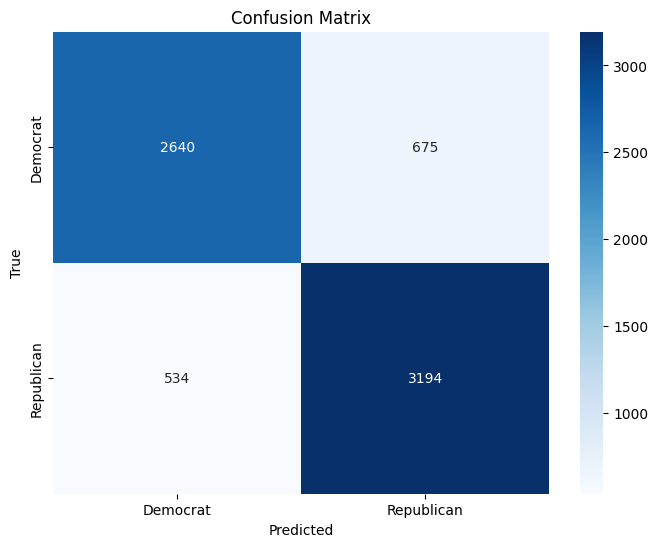

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Democrat", "Republican"], yticklabels=["Democrat", "Republican"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## Explainable ML will be used here to understand how the models make decisions

## Phase 1. EDA - how does the model make decisions and does it differ by other attributes, such as gender, sentiment and so on?